In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [4]:

df = pd.read_csv('Titanic-Dataset.csv')


df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Fare_log'] = np.log1p(df['Fare'])
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [5]:
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(14,10))


<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

Text(0, 0.5, 'Count')

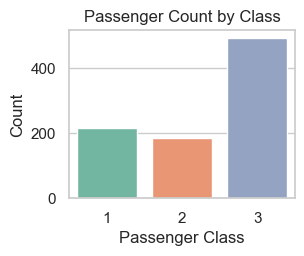

In [6]:
plt.subplot(2,2,1)
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')


Text(0.5, 0, 'Age')

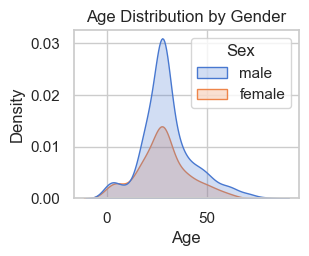

In [7]:
plt.subplot(2,2,2)
sns.kdeplot(data=df, x='Age', hue='Sex', fill=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')


C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


Text(0, 0.5, 'Average Fare')

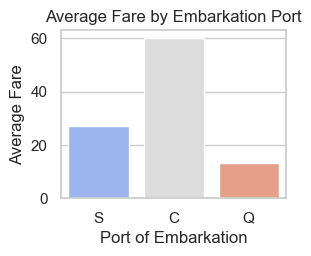

In [8]:
plt.subplot(2,2,3)
sns.barplot(x='Embarked', y='Fare', data=df, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Average Fare by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Average Fare')


Text(0.5, 0, 'Family Size')

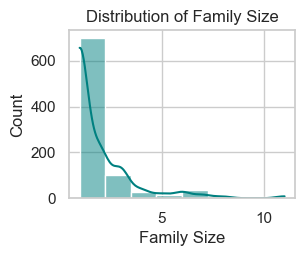

In [9]:
plt.subplot(2,2,4)
sns.histplot(df['FamilySize'], bins=8, kde=True, color='teal')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')


In [10]:
plt.suptitle('Titanic Data Visualization Dashboard', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

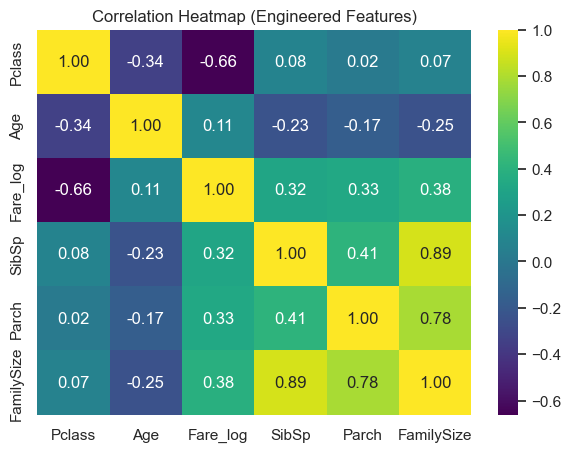

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['Pclass','Age','Fare_log','SibSp','Parch','FamilySize']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap (Engineered Features)')
plt.show()


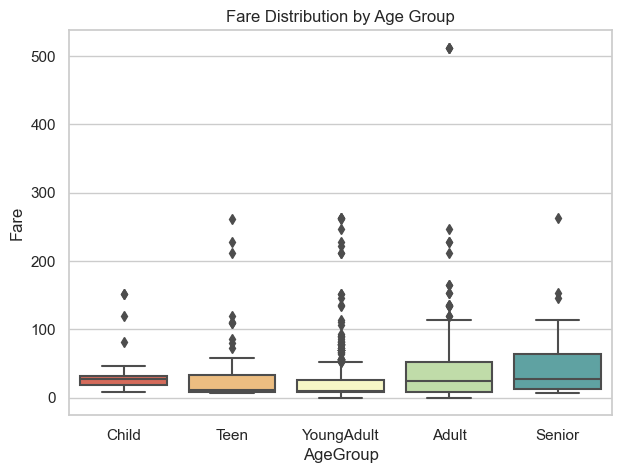

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(x='AgeGroup', y='Fare', data=df, palette='Spectral')
plt.title('Fare Distribution by Age Group')
plt.show()
